In [36]:
# Typical imports here
import numpy as np
import matplotlib.pyplot as plt

```

```
# Load the data from an iNorm save file using `readsav`

In [37]:
from scipy.io import readsav

input_filename = 'Data/CIV1548.2i_o.save'
# input_filename = 'rbs2005_SiII1260_o.save'
spec = readsav(input_filename)

In [38]:
integration_limits=[spec['v1'],spec['v2']]

```

```
# Load the data from an iNorm save file using `pyNorm`

In [39]:
from pyNorm.io import read_inorm

input_filename = 'Data/CIV1548.2i_o.save'
spec=read_inorm(input_filename)

***** Will correct for blemishes, if present. *****


```

```
# Calculating absorber properties with `pyn_batch`

This is a convenience function that does all of the calculations from `pyn_column`, `pyn_eqwidth`, and `pyn_istat`. The details of using the individual procedures are given below.

In [40]:
from pyNorm.aod import pyn_batch

#### Calculate the column density using the velocity limits in the save file

In [41]:
spec_out = pyn_batch(spec)

***** Will correct for blemishes, if present. *****
********** CIV 1548.2 **********
pyn_batch: Wavelength = 1548.204
pyn_batch: f-value = 1.899e-01

Velocity range of integration: -295.0 <= v <= -215.0

--------------------------------------------
log N = 12.692 (-0.446, +0.215)
--------------------------------------------

--------------------------------------------
<v>       = -268.87  +/- 16.90
<b>       =  35.47  +/- 17.96
dv90      =  68.71  +/- 23.90
Skew      =   5.75  +/- 9.46
--------------------------------------------

--------------------------------------------
EW           = 16.43
Stat Error   = 11.99
Cont Error   = 1.75
Tot Error    = 12.12
3sigma EW    < 36.35
***** WARNING: LINE NOT DETECTED AT 3 SIGMA! *****


Linear COG N = 12.61
2sigma N     < 12.78
3sigma N     < 12.96
--------------------------------------------


### Do the same calculations, but without printing the results

In [42]:
spec_out = pyn_batch(spec,integration_limits, verbose = False)

***** Will correct for blemishes, if present. *****


In [43]:
print(spec_out['ncol'],spec_out['EW'])

12.691862353194196 16.430926840187016


### Set the integration limits

In [44]:
integration_limits = [-200,100]
spec_out = pyn_batch(spec, integration_limits)

***** Will correct for blemishes, if present. *****
********** CIV 1548.2 **********
pyn_batch: Wavelength = 1548.204
pyn_batch: f-value = 1.899e-01

Velocity range of integration: -200.0 <= v <= 100.0

--------------------------------------------
log N = 13.922 (-0.038, +0.035)
--------------------------------------------

--------------------------------------------
<v>       = -43.52  +/- 6.60
<b>       =  69.87  +/- 9.02
dv90      = 168.27  +/- 9.33
Skew      =  -0.60  +/- 0.81
--------------------------------------------

--------------------------------------------
EW           = 266.42
Stat Error   = 21.82
Cont Error   = 5.83
Tot Error    = 22.74
3sigma EW    < 68.23


Linear COG N = 13.82
2sigma N     < 13.05
3sigma N     < 13.23
--------------------------------------------


```




```
# Calculating column densities with `pyn_column`

In [45]:
from pyNorm.aod import pyn_column

### 1. Calculate the column with velocity limits in the save file

In [46]:
spec_out = pyn_column(spec)
print(spec_out['ncol'], spec_out['ncol_err_lo'], spec_out['ncol_err_hi'])

12.691862353194196 -0.4460705974686814 0.2153630409396481


### 2. Calculate the column with velocity limits from a variable

In [47]:
integration_limits=[-300,-150]

spec_out = pyn_column(spec,integration_limits)
print(spec_out['ncol'], spec_out['ncol_err_lo'], spec_out['ncol_err_hi'])

13.092609668519898 -0.19184254126807154 0.1326052024875679


### 3. Calculate the column with limits passed directly

In [48]:
spec_out = pyn_column(spec,integration_limits = [-100,-50])
print(spec_out['ncol'], spec_out['ncol_err_lo'], spec_out['ncol_err_hi'])

13.2657466118796 -0.07274040279062355 0.06228699355598799


```

```
# Calculating equivalent widths with `pyn_eqwidth`

In [49]:
from pyNorm.aod import pyn_eqwidth

### 1. Calculate the EW with velocity limits in the save file

In [50]:
spec_out = pyn_eqwidth(spec)
print(spec_out['EW'], spec_out['EW_err'])

16.430926840187016 12.11756149793671


### 2. Calculate the EW with velocity limits from a variable

In [51]:
integration_limits=[-300,-150]

spec_out = pyn_eqwidth(spec,integration_limits)
print(spec_out['EW'], spec_out['EW_err'])

42.7567750739855 16.675528988402192


### 3. Calculate the EW with limits passed directly

In [52]:
spec_out = pyn_eqwidth(spec,integration_limits = [-100,-50])
print(spec_out['EW'], spec_out['EW_err'])

61.35597359368361 8.57671819738032


### 4. Is the line detected at the 2$\sigma$ level?

In [53]:
spec_out['detection_2sig']

True

#### the 3$\sigma$ level?

In [54]:
spec_out['detection_3sig']

True

```

```
# Calculating absorber statistics with `pyn_istat`

In [55]:
from scipy.io import readsav

input_filename = 'Data/CIV1548.2i_o.save'
spec = readsav(input_filename)

In [56]:
integration_limits=[spec['v1'],spec['v2']]
integration_limits=[-200,100]

In [57]:
from pyNorm.aod import pyn_eqwidth
from pyNorm.aod import pyn_column
from pyNorm.aod import pyn_istat

#### Calculate the column density using the velocity limits in the save file

In [58]:
spec_out = pyn_column(spec,integration_limits)
spec_out = pyn_eqwidth(spec_out,integration_limits)
spec_out = pyn_istat(spec_out,integration_limits)
print(spec_out['va'], spec_out['va_err'])
print(spec_out['ba'], spec_out['ba_err'])
print(spec_out['dv90'], spec_out['v90a'],spec_out['v90b'])

-43.516553977463914 6.5953681562108555
69.86918873032936 9.018464031198635
168.2743827749868 -143.35945065818342 24.91493211680338


```


```
# Plotting normalized flux, $N_a(v)$ profiles.

In [59]:
from scipy.io import readsav

input_filename = 'Data/CIV1548.2i_o.save'
spec = read_inorm(input_filename)

***** Will correct for blemishes, if present. *****


(-400.0, 300.0)

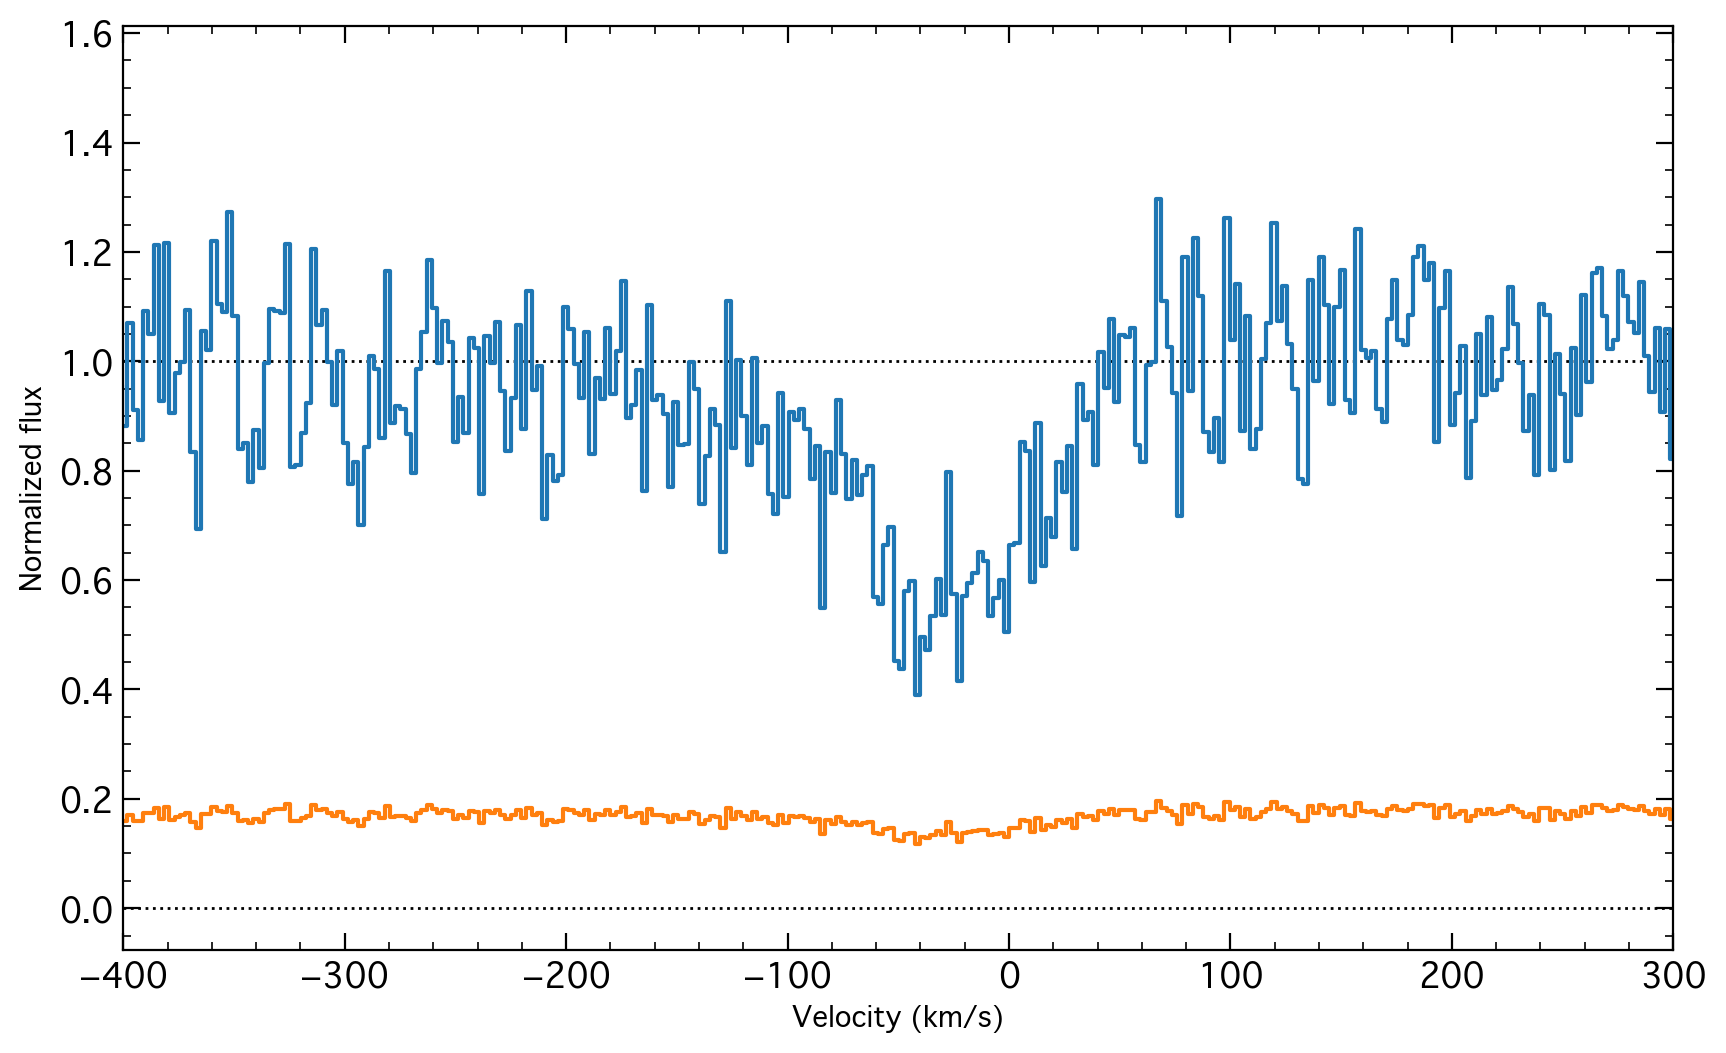

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(spec_out['vnorm'],spec_out['fnorm'],drawstyle='steps-mid')
plt.plot(spec_out['vnorm'],spec_out['fnorm_err'],drawstyle='steps-mid')

plt.axhline(0,linestyle=':',color='k',linewidth=1,zorder=0)
plt.axhline(1,linestyle=':',color='k',linewidth=1,zorder=0)
plt.xlabel('Velocity (km/s)')
plt.ylabel('Normalized flux')
plt.xlim(-400,300)

(-400.0, 300.0)

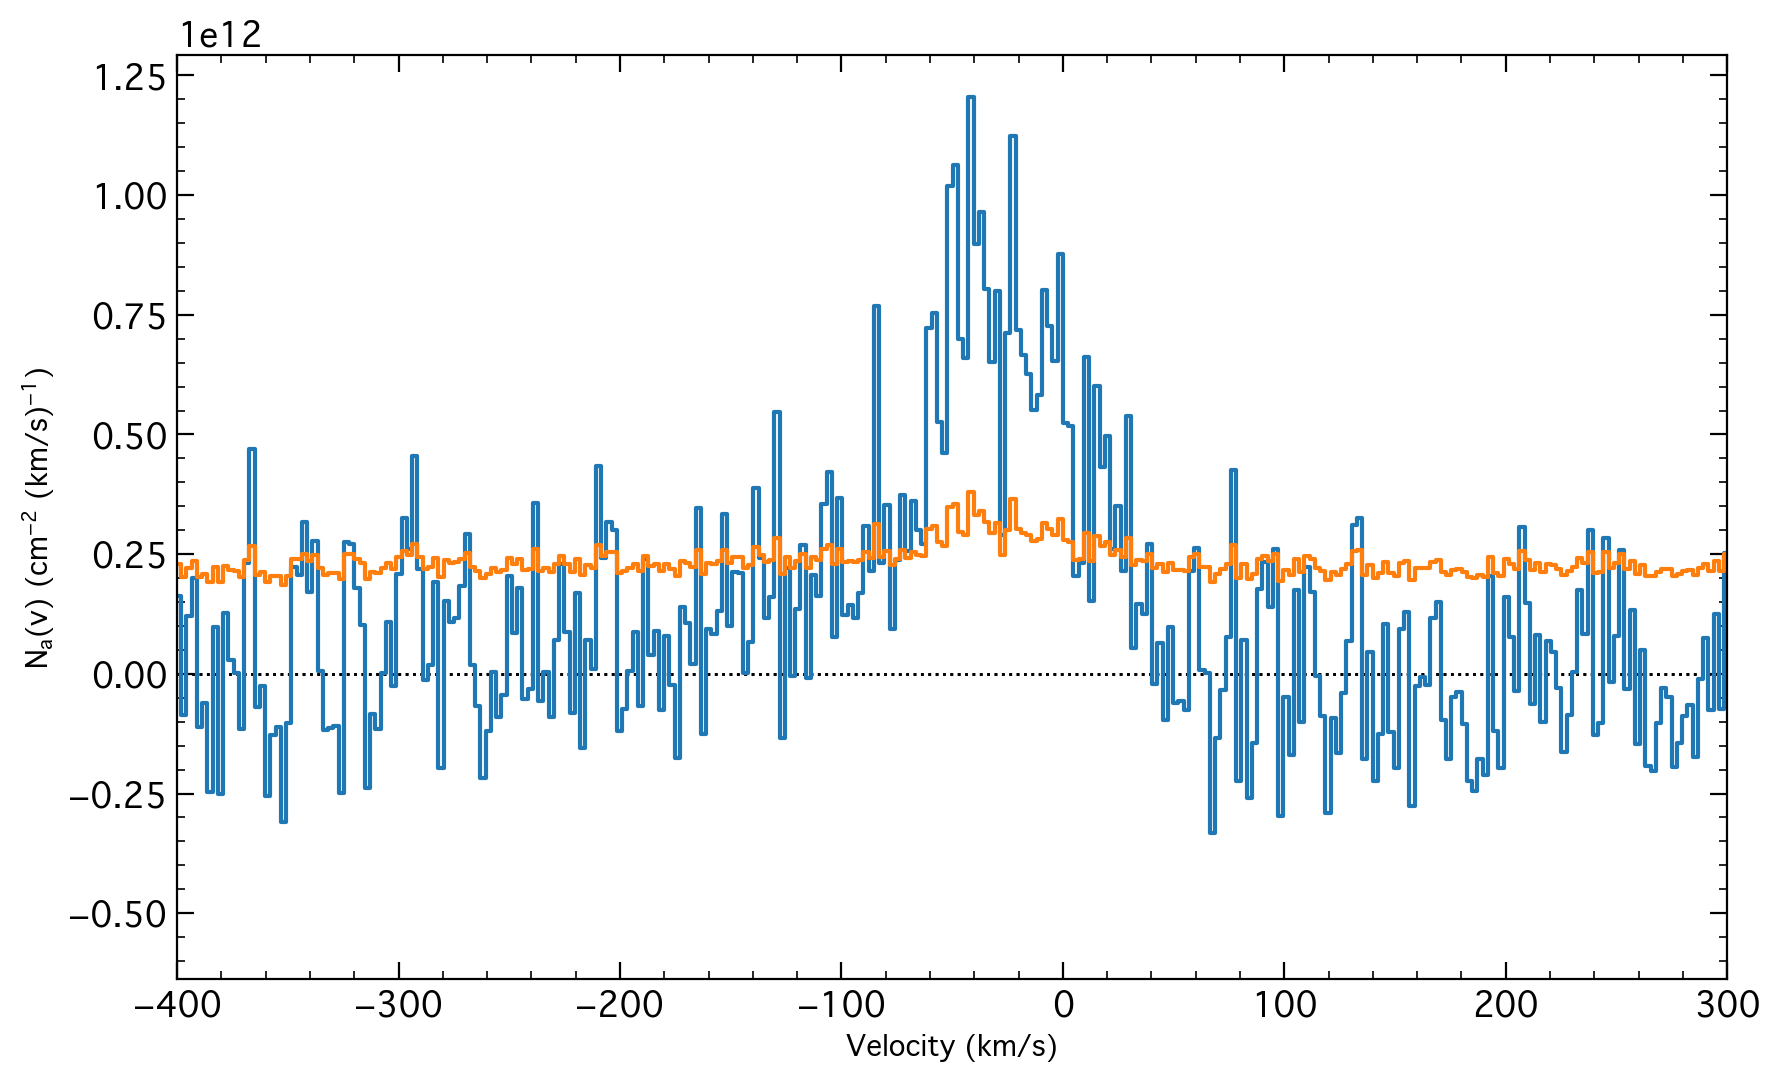

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(spec_out['vnorm'],spec_out['Nav'],drawstyle='steps-mid')
plt.plot(spec_out['vnorm'],spec_out['Nav_err'],drawstyle='steps-mid')

plt.axhline(0,linestyle=':',color='k',linewidth=1,zorder=0)
plt.axhline(1,linestyle=':',color='k',linewidth=1,zorder=0)
plt.xlabel('Velocity (km/s)')
plt.ylabel('$N_a(v)$ (cm$^{-2}$ (km/s)$^{-1}$)')
plt.xlim(-400,300)

```


```
# Identifying saturated pixels.

In [62]:
from pyNorm.io import read_inorm

input_filename = 'Data/BD+532790_SiIV1402.8i_o.save'
spec=read_inorm(input_filename)

***** Will correct for blemishes, if present. *****


/Users/howk/KODIAQ Dropbox/Chris Howk/python/pyNorm/pyNorm/aod/pyn_aod.py:219: RuntimeWarning: invalid value encountered in log
  tau_array = np.log(continuum / flux)


#### Calculate the column density using the velocity limits in the save file

In [63]:
from pyNorm.aod import pyn_batch
from pyNorm.aod import xlimit

spec_out = pyn_batch(spec)

***** Will correct for blemishes, if present. *****
********** SiIV 1402.8 **********
pyn_batch: Wavelength = 1402.773
pyn_batch: f-value = 2.540e-01

Velocity range of integration: -53.7 <= v <= 12.2

--------------------------------------------
log N = 12.795 (-0.179, +0.126)
--------------------------------------------

--------------------------------------------
<v>       = -27.55  +/- 5.36
<b>       =  21.85  +/- 4.66
dv90      =  51.46  +/- 7.58
Skew      =   0.54  +/- 1.05
--------------------------------------------

--------------------------------------------
EW           = 25.88
Stat Error   = 2.39
Cont Error   = 8.15
Tot Error    = 8.50
3sigma EW    < 25.50


Linear COG N = 12.77
2sigma N     < 12.58
3sigma N     < 12.76
--------------------------------------------


#### Identify the integration region

In [64]:
idx = np.full(np.size(spec['vel']),False)
xlim1, xlim2 = \
    xlimit(spec['vel'],[spec['v1'],spec['v2']])
idx[xlim1:xlim2] = True

## Plot the spectrum, marking pixels in the integration range and saturated pixels.

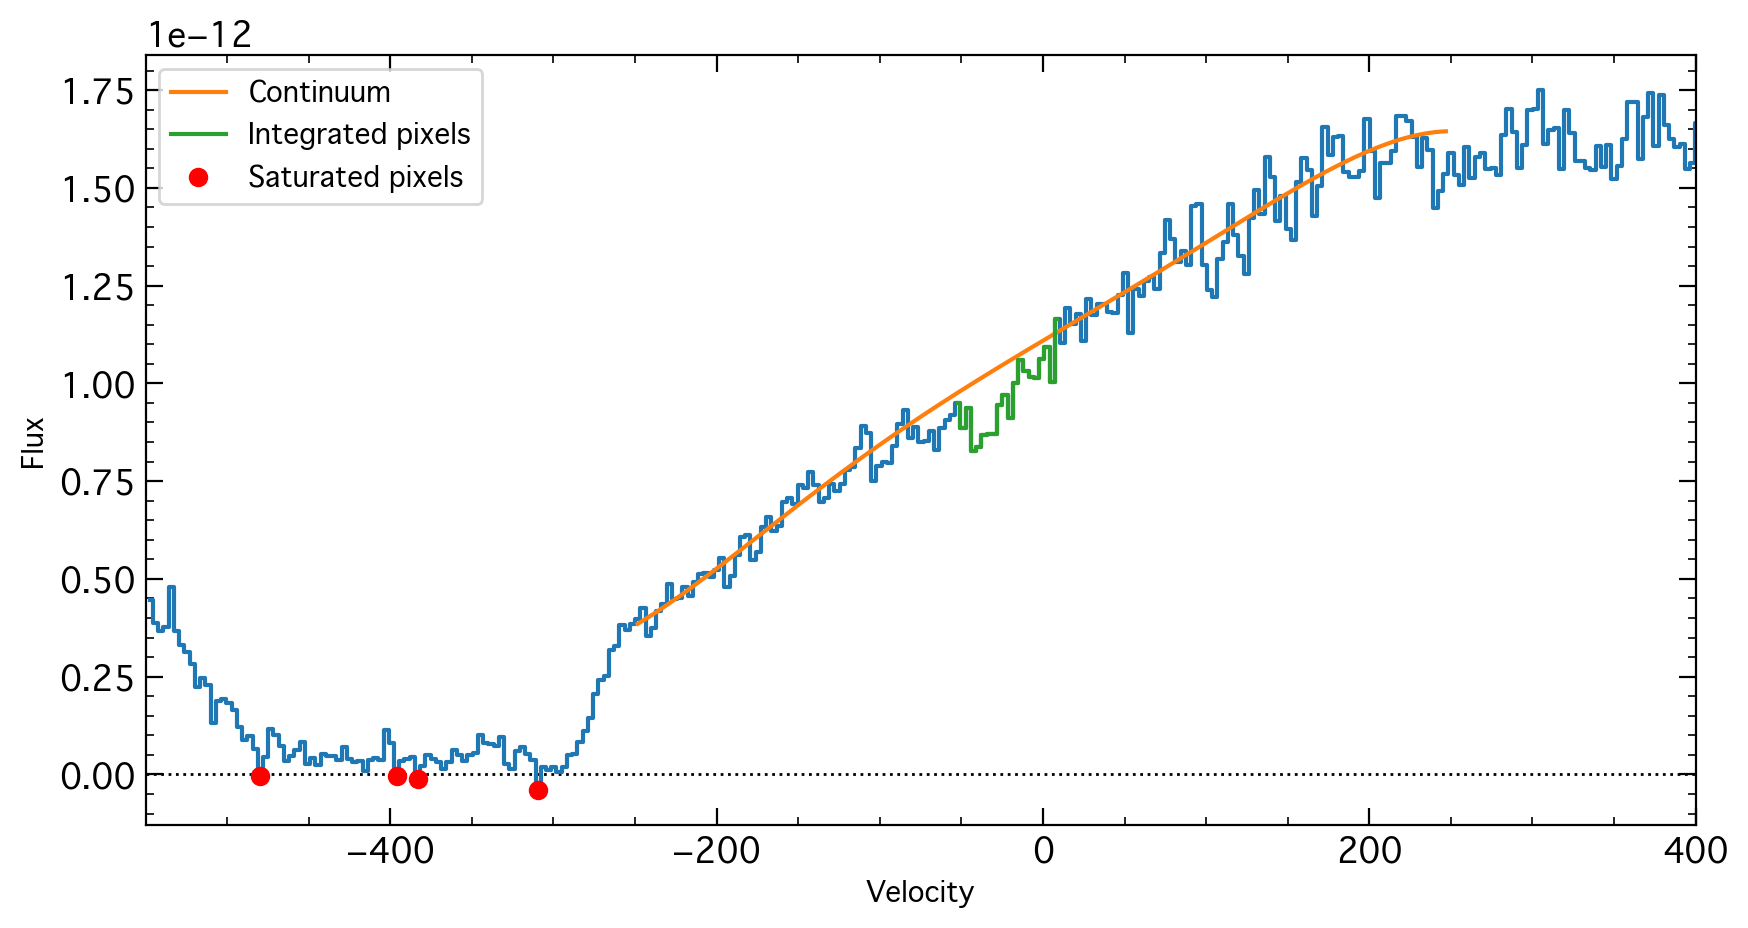

In [65]:
plt.figure(figsize=(10,5))
plt.xlim(-550,400)
plt.xlabel('Velocity')
plt.ylabel('Flux')

# Plot the spectrum
plt.plot(spec['vel'],spec['flux'],drawstyle='steps-mid')

# Plot the continuum
gd=(spec['vel']>-250) & (spec['vel']<250) 
plt.plot(spec['vel'][gd],spec['contin'][gd],label='Continuum')

# Overplot the integration range
plt.plot(spec['vel'][idx],spec['flux'][idx],drawstyle='steps-mid',
        label='Integrated pixels')

# Identify pixels that are definitively saturated. 
plt.plot(spec['vel'][spec['Nav_sat']],spec['flux'][spec['Nav_sat']],'or',
        label='Saturated pixels')

plt.axhline(0,linestyle=':',zorder=0,linewidth=1,color='k')

plt.legend();